# Introduction to Cloud Machine Learning with Flask API and CNTK



In [2]:
#load libraries
import os,sys
import pkg_resources
from flask import Flask, render_template, request, send_file
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import wget
import numpy as np
from PIL import Image, ImageOps
from urllib.request import urlretrieve
from cntk import load_model, combine
import mxnet as mx

print("System version: {}".format(sys.version))
print("Flask version: {}".format(pkg_resources.get_distribution("flask").version))
print("CNTK version: {}".format(pkg_resources.get_distribution("cntk").version))

System version: 3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Flask version: 0.12
CNTK version: 2.0.beta9.0


## Image classification with a pretrained CNTK model
The model is a ResNet with 18 layers, but there are other models that you can try.

In [13]:
def maybe_download_model(filename='ResNet_18.model'):
    if(os.path.isfile(filename)):
        print("Model %s already downloaded" % filename)
    else:
        model_name_to_url = {
        'AlexNet.model':   'https://www.cntk.ai/Models/AlexNet/AlexNet.model',
        'AlexNetBS.model': 'https://www.cntk.ai/Models/AlexNet/AlexNetBS.model',
        'ResNet_18.model': 'https://www.cntk.ai/Models/ResNet/ResNet_18.model',
        }
        url = model_name_to_url[filename] #TODO: try/except in case incorrect filename
        wget.download(url)

In [14]:
model_name = 'ResNet_18.model'
maybe_download_model(model_name)

Model ResNet_18.model already downloaded


In [27]:
def read_synsets(filename='synsets.txt'):
    with open(filename, 'r') as f:
        synsets = [l.rstrip() for l in f]
        labels = [" ".join(l.split(" ")[1:]) for l in synsets]
    return labels

labels = read_synsets()
print("Label length: ", len(labels))


Label length:  1000


Let's read images with PIL, plot them and crop them to the ImageNet size: `224x224`.

In [30]:
def read_image_from_file(filename):
    img = Image.open(filename)
    return img
def read_image_from_request(image_request):
    img = Image.open(BytesIO(image_request.read())).convert('RGB')
    return img
def read_image_from_url(url):
    filename = urlretrieve(url)[0]
    return read_image_from_file(filename)

In [32]:
def plot_image(img):
    cmap = None
    plt.imshow(img)
    plt.axis('off')
    plt.show()

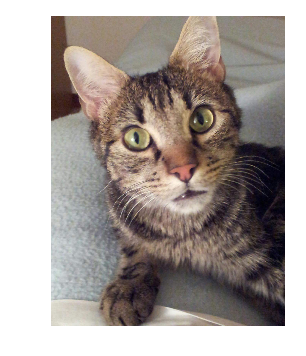

In [33]:
imagepath = 'neko.jpg'
img = read_image_from_file(imagepath)
plot_image(img)

In [ ]:
def predict(filename, synsets):
    
    # Load image and resize    
    img = Image.open(filename)
    # Centre crop
    img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)
    
    # Show image
    plt.imshow(img)
    plt.axis('off')
    
    # Do we need to subtract mean? Or batch normalisation layer takes cares of this???
    
    img = np.array(img, dtype=np.float32)
    img = np.ascontiguousarray(np.transpose(img, (2, 0, 1)))
    
    # Use last layer to make prediction
    z_out = combine([z.outputs[3].owner])
    result = np.squeeze(z_out.eval({z_out.arguments[0]:[img]}))

    # Sort probabilities 
    a = np.argsort(result)[-5:]  
    
    #predicted_category = " ".join(synsets[a].split(" ")[1:])
    for pos in a:
        predicted_category = " ".join(synsets[pos].split(" ")[1:])
        print(predicted_category)

In [ ]:
# Load CNTK Model
model_path = '/datadrive/installer/cntk/Examples/Image/PretrainedModels/ResNet_152.model'
z = load_model(model_path)

In [ ]:
predict(get_image("http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg"), LABELS)

In [ ]:
predict(get_image("https://migonzastorage.blob.core.windows.net/deep-learning/neko.jpg"), LABELS)

In [ ]:
predict(get_image("https://upload.wikimedia.org/wikipedia/commons/1/1e/Bald_Eagle_Portrait.jpg"), LABELS)